<a href="https://colab.research.google.com/github/rmahesh6386/Resume-Classification-Project-/blob/main/Resume_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# to skip install part and import library 
from google.colab import drive
drive.mount('/content/gdrive')
import sys
sys.path.append('/content/gdrive/My Drive/Colab Notebooks')

Mounted at /content/gdrive


In [2]:
import os
import docx
import PyPDF2
import io 
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
import pandas as pd
import pdfplumber
import pikepdf

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
# Function to extract text from resume
def getText(filename):
      
    # Create empty string 
    fullText = ''
    if filename.endswith('.docx'):
        doc = docx.Document(filename)
        
        for para in doc.paragraphs:
            fullText = fullText + para.text
            
           
    elif filename.endswith('.pdf'):  
        with open(filename, "rb") as pdf_file:
            pdoc = PyPDF2.PdfFileReader(filename)
            number_of_pages = pdoc.getNumPages()
            page = pdoc.pages[0]
            page_content = page.extractText()
             
        for paragraph in page_content:
            fullText =  fullText + paragraph
            
    else:
        try:
            import aspose.words as aw
            output = aw.Document()
        # Remove all content from the destination document before appending.
            output.remove_all_children()
            input = aw.Document(filename)
        # Append the source document to the end of the destination document.
            output.append_document(input, aw.ImportFormatMode.KEEP_SOURCE_FORMATTING)
            output.save("Output.docx");
            doc = docx.Document('Output.docx')
        
            for para in doc.paragraphs:
                fullText = fullText + para.text
            fullText = fullText[79:]
        except:
            filename.endswith(".zip")
         
    return (fullText)

In [4]:
# Function to remove punctuation and tokenize the text
def tokenText(extText):
   
    # Remove punctuation marks
    punc = '''!()-[]{};:'"\,.<>/?@#$%^&*_~'''
    puncText=" "
    for ele in extText:
        if ele in punc:
            puncText= extText.replace(ele, "")
            #print(puncText)
    # Tokenize the text and remove stop words
    stop_words = set(stopwords.words('english'))
    puncText.split()
    word_tokens = word_tokenize(puncText)
    TokenizedText = [w for w in word_tokens if not w.lower() in stop_words]
    TokenizedText = []
  
    for w in word_tokens:
        if w not in stop_words:
            TokenizedText.append(w)
    return(TokenizedText)

In [5]:
# Define key terms dictionary for fixing Role Applied for 
terms = {'WorkDay ERP':['workday', 'workday consultant', 'workday hcm', 'eib', 'picof', 
                        'workday studio','nnbound/outbound integrations'],
         'Peoplesoft':['peoplesoft', 'pia','ccb','birt','peci','ccw','pum','people tools',
                        'peoplesoft implementation','peoplesoft components',
                        'peoplesoft dba','peoplesoft admin','peoplesoft admin/dba','peopleSoft fscm', 
                        'peopletoolsupgrade','peopletools upgrade','process scheduler servers',
                        'peoplesoft hrms','peopleSoft consultant','peoplesoft cloud',
                        'PeopleSoft migrations','eoplesoft Testing Framework','pure internet architecture'],             
         'Database Developer':['sql','sql server', 'ms sql server','msbi', 'sql developer', 'ssis','ssrs',
                        'ssms','t-sql','tsql','Razorsql', 'razor sql','triggers','powerbi','power bi',
                        'oracle sql', 'pl/sql', 'pl\sql','oracle', 'oracle 11g','oledb','cte','ddl',
                        'dml','etl','mariadb','maria db'],
         'Java Developer':['reactjs', 'react js', 'react js developer', 'html', 'React JS'
                        'css3','xml','javascript','html5','boostrap','jquery', 'redux','php', 'node js',
                        'nodejs','apache','netbeans','nestjs','nest js','react developer','react hooks',
                        'jenkins']}

In [6]:
# List of all key terms to indicate skillset. Include all the key words in the list 
allTerms = ['workday', 'hcm', 'eib', 'picof','workday hcm',
                        'workday studio','nnbound/outbound integrations',
                        'peoplesoft', 'pia','ccb','birt','peci','ccw','pum','people tools',
                        'peoplesoft implementation','peoplesoft components',
                        'peoplesoft dba','peoplesoft admin','peoplesoft admin/dba','peopleSoft fscm', 
                        'peopletoolsupgrade','peopletools upgrade','process scheduler servers',
                        'peoplesoft hrms','peopleSoft consultant','peopledoft cloud',
                        'PeopleSoft migrations','eoplesoft Testing Framework','pure internet architecture',
                        'sql','sql server', 'ms sql server','msbi', 'sql developer', 'ssis','ssrs',
                        'ssms','t-sql','tsql','Razorsql', 'razor sql','triggers','powerbi','power bi',
                        'oracle sql', 'pl/sql', 'pl\sql','oracle', 'oracle 11g','oledb','cte','ddl',
                        'dml','etl','mariadb','maria db','reactjs', 'react js', 'react js developer', 'html', 
                        'css3','xml','javascript','html5','boostrap','jquery', 'redux','php', 'node js',
                        'nodejs','apache','netbeans','nestjs','nest js','react developer','react hooks',
                        'jenkins']

In [7]:
# Function to read the tokenized text and search for the key words to dermine the Role Applied for
def roleApplied (Text):
    
    # covert the text to lower case
    for i in range(len(Text)):
        Text[i] = Text[i].lower()
    
    # Obtain the scores for each area
    for area in terms.keys():
        if area == 'WorkDay ERP':
            for word in terms[area]:
                if word in Text:
                    role = area
                    return (role)
                
        elif area == 'Peoplesoft':
            for word in terms[area]:
                if word in Text:
                    role = area
                    return(role)   
                
        elif area == 'Database Developer':
            for word in terms[area]:
                if word in Text:
                    role =  area
                    return(role)
            
        elif area == 'Java Developer':
             for word in terms[area]:
                if word in Text:
                    role = area
                    return(role)
        else:
            role = "Fresher"
            return(role)
   # return(role)

In [8]:
# Function to extract Name and contact details
def contactDetails(Text):
    name = ''  
    for i in range(0,3):
        name = " ".join([name,Text[i]])
    return(name)

In [9]:
# Function to extract experience details
def expDetails(Text):
    global sent
   
    Text = Text.split()
   
    for i in range(len(Text)-2):
        Text[i].lower()
        
        if Text[i] ==  'years':
            sent =  Text[i-2] + ' ' + Text[i-1] +' ' + Text[i] +' '+ Text[i+1] +' ' + Text[i+2]
            return (sent)

In [10]:
# Function to extract skill set details
def skillSet(Text):
    t = []
    for i in range(len(Text)):
        if Text[i] in allTerms:
            if Text[i] in t:
                continue
            t.append(Text[i]) 
    return(t)

In [11]:
# Create an empty Data Frame ResumeText with two columns
ResumeText = pd.DataFrame([], columns=['Name','RoleApplied', 'Experience', 'SkillSet','TextInfo'])

# Mention the path in your computer where resumes folder is stored
path = r"/content/gdrive/MyDrive/Resumes"
text =[]

# Search the directory path and loop through the resume documents and callthe function getText
for filename in os.listdir(path):
    filename = os.path.join(path, filename)
    extText = getText(filename)
    #print(type(extText))
    tokText = tokenText(extText)
    #print(extText)
    role = roleApplied(tokText)
    Name = contactDetails(tokText)
    experience = expDetails(extText)
    skills = skillSet(tokText)
    NewRow = [Name,role,experience, skills,tokText]  
    ResumeText.loc[len(ResumeText)] = NewRow

In [12]:
ResumeText.head(80)

,Name,RoleApplied,Experience,SkillSet,TextInfo
0,anil kumar maddukuri,Database Developer,Developer Summary2.4 years of experience,"[sql, msbi, ssms, ssis, ssrs, triggers, cte, etl]","[anil, kumar, maddukuri, sql, &, msbi, develop..."
1,buddha vamsi career,Database Developer,OBJECTIVE:Have 2.11 years of IT,"[sql, oracle, triggers, cte, etl]","[buddha, vamsi, career, objective, :, have, 21..."
2,aradhana tripathicurrent location,Database Developer,than 4 years of working,"[sql, mariadb, triggers, ddl, dml, t-sql, ssms]","[aradhana, tripathicurrent, location, :, gachi..."
3,name : gopi,WorkDay ERP,with 3+ years as Workday,"[workday, hcm, eib, picof, xml, birt]","[name, :, gopi, krishna, reddy, professional, ..."
4,susovan bag seeking,Database Developer,None,"[html, sql]","[susovan, bag, seeking, challenging, position,..."
...,...,...,...,...,...
74,anubhav kumar singh,Peoplesoft,None,"[peoplesoft, hcm, pum, jenkins, oracle, pia]","[anubhav, kumar, singh, to, work, globally, co..."
75,ramesh a (,WorkDay ERP,overall 5+ years of professional,"[workday, hcm, eib, sql, peoplesoft]","[ramesh, a, (, workday, hcm, consultant, ), pr..."
76," 204 ,",Java Developer,"layout,nizampet,Hyderabad,500090.Having 3 year...","[javascript, html5, css3, html]","[, 204, ,, sri, geethika, prestige, ,, road, ..."
77,c o n,Peoplesoft,than 3.2 years of experience,"[peoplesoft, sql]","[c, o, n, t, a, c, t, :, address, :, manyata, ..."


In [13]:
pd.set_option('display.max_rows', None)
ResumeText.Experience.str.extract("(\d.\d+|\d+)")

,0
0,2.4
1,2.11
2,4
3,3
4,NaN
5,2.8
6,NaN
7,3
8,NaN
9,2.6


In [14]:
ResumeText[ResumeText['Name'].isna()]

,Name,RoleApplied,Experience,SkillSet,TextInfo


In [15]:
ResumeText[ResumeText['RoleApplied'].isna()]

,Name,RoleApplied,Experience,SkillSet,TextInfo
41,name ravali p,None,None,[],"[name, ravali, p, curriculum, vitae, specializ..."
59,venkatalakshmi pedireddysoftware developerexp...,None,None,[],"[venkatalakshmi, pedireddysoftware, developere..."
65,curriculum vitaethis document,None,None,[],"[curriculum, vitaethis, document, truncated, c..."


In [16]:
ResumeText[ResumeText['SkillSet'].isna()]

,Name,RoleApplied,Experience,SkillSet,TextInfo


In [17]:
ResumeText[ResumeText['TextInfo'].isna()]

,Name,RoleApplied,Experience,SkillSet,TextInfo


In [18]:
ResumeText['RoleApplied'].value_counts()

WorkDay ERP           21
Peoplesoft            20
Database Developer    18
Java Developer        17
Name: RoleApplied, dtype: int64

(array([1., 0., 1., 0., 0., 0., 0., 1., 0., 1.]),
 array([17. , 17.4, 17.8, 18.2, 18.6, 19. , 19.4, 19.8, 20.2, 20.6, 21. ]),
 <a list of 10 Patch objects>)

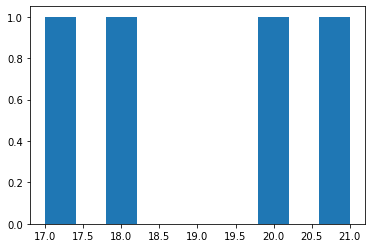

In [19]:
import matplotlib.pyplot as plt
plt.hist(ResumeText['RoleApplied'].value_counts())

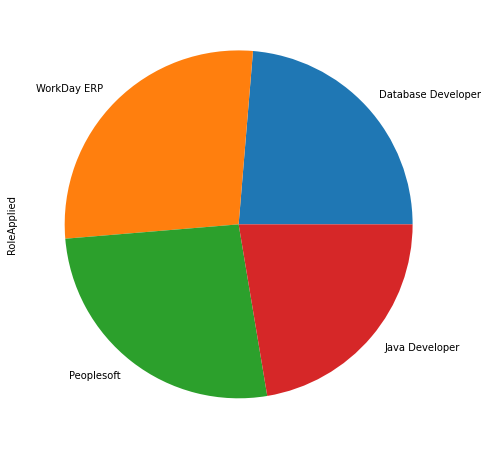

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
ResumeText['RoleApplied'].value_counts(sort=False).plot.pie()
plt.show()

In [21]:
emptyseries = pd.isnull(ResumeText["RoleApplied"])
#emptyseries.dtype
ResumeText[emptyseries]

,Name,RoleApplied,Experience,SkillSet,TextInfo
41,name ravali p,None,None,[],"[name, ravali, p, curriculum, vitae, specializ..."
59,venkatalakshmi pedireddysoftware developerexp...,None,None,[],"[venkatalakshmi, pedireddysoftware, developere..."
65,curriculum vitaethis document,None,None,[],"[curriculum, vitaethis, document, truncated, c..."


In [22]:
emptyseries = pd.isnull(ResumeText['Experience'])
#emptyseries.dtype
ResumeText[emptyseries]

,Name,RoleApplied,Experience,SkillSet,TextInfo
4,susovan bag seeking,Database Developer,None,"[html, sql]","[susovan, bag, seeking, challenging, position,..."
6,resumename neeraj mishrahaving,Database Developer,None,"[oracle, sql, pl/sql, triggers, ddl, dml]","[resumename, neeraj, mishrahaving, 3, year, 6,..."
8,himamendu career objectiveto,WorkDay ERP,None,"[workday, hcm, eib]","[himamendu, career, objectiveto, continue, gro..."
12,haripriya battina experience,Database Developer,None,"[reactjs, javascript, html, sql]","[haripriya, battina, experience, ui, developer..."
14,hari krishna msummary,WorkDay ERP,None,"[workday, hcm, eib, birt, xml, peoplesoft, ora...","[hari, krishna, msummary, :, a, result, orient..."
15,career objective pursuing,Peoplesoft,None,"[peoplesoft, oracle, sql, pia]","[career, objective, pursuing, peoplesoft, exec..."
18,resumeramalakshmi k career,Database Developer,None,"[sql, ssis, etl, t-sql]","[resumeramalakshmi, k, career, objective, prof..."
19,name : rameshcareer,Database Developer,None,"[sql, etl, ssis, ssrs, ssms, msbi, ddl, triggers]","[name, :, rameshcareer, objective, :, to, cont..."
25,naveen sadhutitle :,Database Developer,None,"[html, sql, reactjs]","[naveen, sadhutitle, :, software, developer, l..."
30,thirupathamma ballasummary:28 year,Java Developer,None,[javascript],"[thirupathamma, ballasummary:28, year, it, exp..."


In [23]:
sqldeveloper = (ResumeText["RoleApplied"] == "Java Developer")
ResumeText[sqldeveloper]  

,Name,RoleApplied,Experience,SkillSet,TextInfo
20,ui-developer/ react js,Java Developer,all 3.2 years of Extensive,"[html, xml, javascript, redux, html5, css3, no...","[ui-developer/, react, js, developer, name, :,..."
21,ui-developer/ react js,Java Developer,all 3.2 years of Extensive,"[html, xml, javascript, redux, html5, css3, no...","[ui-developer/, react, js, developer, name, :,..."
22,kamalakar reddy .,Java Developer,● 3 years of experience,"[html5, css3, javascript, redux, html, reactjs...","[kamalakar, reddy, ., a, linked, in, https//ww..."
24,pragnya pattnaik expertise,Java Developer,around 2 years of experience,"[html5, css3, javascript, jquery]","[pragnya, pattnaik, expertise, :, having, arou..."
26,kanumuru deepak reddycareer,Java Developer,of 2 years from MetroLabs,"[html5, css3, javascript, html, redux, reactjs]","[kanumuru, deepak, reddycareer, objective, :, ..."
30,thirupathamma ballasummary:28 year,Java Developer,None,[javascript],"[thirupathamma, ballasummary:28, year, it, exp..."
31,kotani durga prasadobjective,Java Developer,flexible.Professional Summary:3.1 years of exp...,"[html, html5, css3, javascript, jquery]","[kotani, durga, prasadobjective, :, aspirant, ..."
32,md khizaruddin rauf,Java Developer,None,"[html, redux, javascript]","[md, khizaruddin, rauf, experience, ⇨, current..."
33,mareedu lokesh babuprofessional,Java Developer,Around 2 years of experience,"[html, javascript, jquery, php]","[mareedu, lokesh, babuprofessional, overview, ..."
34,mareedu lokesh babuprofessional,Java Developer,Around 2 years of experience,"[html, javascript, jquery, php]","[mareedu, lokesh, babuprofessional, overview, ..."


In [24]:
ResumeText

,Name,RoleApplied,Experience,SkillSet,TextInfo
0,anil kumar maddukuri,Database Developer,Developer Summary2.4 years of experience,"[sql, msbi, ssms, ssis, ssrs, triggers, cte, etl]","[anil, kumar, maddukuri, sql, &, msbi, develop..."
1,buddha vamsi career,Database Developer,OBJECTIVE:Have 2.11 years of IT,"[sql, oracle, triggers, cte, etl]","[buddha, vamsi, career, objective, :, have, 21..."
2,aradhana tripathicurrent location,Database Developer,than 4 years of working,"[sql, mariadb, triggers, ddl, dml, t-sql, ssms]","[aradhana, tripathicurrent, location, :, gachi..."
3,name : gopi,WorkDay ERP,with 3+ years as Workday,"[workday, hcm, eib, picof, xml, birt]","[name, :, gopi, krishna, reddy, professional, ..."
4,susovan bag seeking,Database Developer,None,"[html, sql]","[susovan, bag, seeking, challenging, position,..."
5,kamballa pradeep synopsislooking,Database Developer,organization.SUMMARYHaving 2.8 years of Profes...,"[sql, ddl, dml, triggers, ssis, t-sql, cte]","[kamballa, pradeep, synopsislooking, forward, ..."
6,resumename neeraj mishrahaving,Database Developer,None,"[oracle, sql, pl/sql, triggers, ddl, dml]","[resumename, neeraj, mishrahaving, 3, year, 6,..."
7,venkata saikrishna workday,WorkDay ERP,all 3 years of IT,"[workday, eib]","[venkata, saikrishna, workday, consultantprofs..."
8,himamendu career objectiveto,WorkDay ERP,None,"[workday, hcm, eib]","[himamendu, career, objectiveto, continue, gro..."
9,sql developername :,Database Developer,individual growth.2.6 years of experience,"[sql, t-sql, cte]","[sql, developername, :, -, bandi, prem, saiwil..."


In [25]:
stopwords=stopwords.words("english")

In [26]:
from nltk.stem.porter import PorterStemmer 
import re

In [27]:
ps=PorterStemmer()

In [28]:
def preprocess(x):
         x=re.sub('[^a-zA-Z ]', ' ', x)
         x=x.lower()
         x=x.split()  
         x=[word  for word in x if word not in set(stopwords.words('english'))]  
         x=[ps.stem(word) for word in x] 
         x=" ".join(x)
         return x

In [29]:
ResumeText.head()

,Name,RoleApplied,Experience,SkillSet,TextInfo
0,anil kumar maddukuri,Database Developer,Developer Summary2.4 years of experience,"[sql, msbi, ssms, ssis, ssrs, triggers, cte, etl]","[anil, kumar, maddukuri, sql, &, msbi, develop..."
1,buddha vamsi career,Database Developer,OBJECTIVE:Have 2.11 years of IT,"[sql, oracle, triggers, cte, etl]","[buddha, vamsi, career, objective, :, have, 21..."
2,aradhana tripathicurrent location,Database Developer,than 4 years of working,"[sql, mariadb, triggers, ddl, dml, t-sql, ssms]","[aradhana, tripathicurrent, location, :, gachi..."
3,name : gopi,WorkDay ERP,with 3+ years as Workday,"[workday, hcm, eib, picof, xml, birt]","[name, :, gopi, krishna, reddy, professional, ..."
4,susovan bag seeking,Database Developer,None,"[html, sql]","[susovan, bag, seeking, challenging, position,..."


In [30]:
#tem.review=tem.review.apply(lambda x: [ps.stem(word) for word in x])
ResumeText.TextInfo=ResumeText.TextInfo.apply(lambda x: [ps.stem(word) for word in x])

In [31]:
ResumeText.head()

,Name,RoleApplied,Experience,SkillSet,TextInfo
0,anil kumar maddukuri,Database Developer,Developer Summary2.4 years of experience,"[sql, msbi, ssms, ssis, ssrs, triggers, cte, etl]","[anil, kumar, maddukuri, sql, &, msbi, develop..."
1,buddha vamsi career,Database Developer,OBJECTIVE:Have 2.11 years of IT,"[sql, oracle, triggers, cte, etl]","[buddha, vamsi, career, object, :, have, 211, ..."
2,aradhana tripathicurrent location,Database Developer,than 4 years of working,"[sql, mariadb, triggers, ddl, dml, t-sql, ssms]","[aradhana, tripathicurr, locat, :, gachibowli,..."
3,name : gopi,WorkDay ERP,with 3+ years as Workday,"[workday, hcm, eib, picof, xml, birt]","[name, :, gopi, krishna, reddi, profession, su..."
4,susovan bag seeking,Database Developer,None,"[html, sql]","[susovan, bag, seek, challeng, posit, field, s..."


In [32]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
lb=preprocessing.LabelEncoder()
ResumeText['role']= lb.fit_transform(ResumeText['RoleApplied'])

In [33]:
df=pd.DataFrame(ResumeText.drop(["Name"],axis=1))
df=df.drop(["RoleApplied"],axis=1)
df=df.drop(["Experience"],axis=1)
df=df.drop(["TextInfo"],axis=1)

In [34]:
df.head()

,SkillSet,role
0,"[sql, msbi, ssms, ssis, ssrs, triggers, cte, etl]",0
1,"[sql, oracle, triggers, cte, etl]",0
2,"[sql, mariadb, triggers, ddl, dml, t-sql, ssms]",0
3,"[workday, hcm, eib, picof, xml, birt]",3
4,"[html, sql]",0


In [35]:
df['SkillSet'] = df['SkillSet'].apply(lambda x: ','.join(map(str, x)))

In [36]:
df.head()

,SkillSet,role
0,"sql,msbi,ssms,ssis,ssrs,triggers,cte,etl",0
1,"sql,oracle,triggers,cte,etl",0
2,"sql,mariadb,triggers,ddl,dml,t-sql,ssms",0
3,"workday,hcm,eib,picof,xml,birt",3
4,"html,sql",0


In [37]:
df.role

0     0
1     0
2     0
3     3
4     0
5     0
6     0
7     3
8     3
9     0
10    3
11    2
12    0
13    2
14    3
15    2
16    0
17    3
18    0
19    0
20    1
21    1
22    1
23    0
24    1
25    0
26    1
27    3
28    2
29    3
30    1
31    1
32    1
33    1
34    1
35    1
36    0
37    2
38    3
39    2
40    2
41    4
42    1
43    2
44    1
45    2
46    3
47    3
48    3
49    1
50    3
51    2
52    1
53    0
54    3
55    0
56    2
57    2
58    3
59    4
60    3
61    2
62    0
63    2
64    2
65    4
66    2
67    2
68    2
69    3
70    3
71    1
72    3
73    3
74    2
75    3
76    1
77    2
78    0
Name: role, dtype: int64

In [38]:
#tem.review=tem.review.apply(lambda x: " ".join(x))
df.TextInfo=df.SkillSet.apply(lambda x: " ".join(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [39]:
df.head()

,SkillSet,role
0,"sql,msbi,ssms,ssis,ssrs,triggers,cte,etl",0
1,"sql,oracle,triggers,cte,etl",0
2,"sql,mariadb,triggers,ddl,dml,t-sql,ssms",0
3,"workday,hcm,eib,picof,xml,birt",3
4,"html,sql",0


In [62]:
import numpy as np
a=np.array(df.SkillSet)

In [63]:
from sklearn.feature_extraction.text import CountVectorizer 
  
cv = CountVectorizer()
a1 = cv.fit_transform(a).toarray() 
a2=pd.DataFrame(a1,columns=cv.get_feature_names_out())

In [64]:
a2

,apache,birt,ccb,ccw,css3,cte,ddl,dml,eib,etl,...,pum,reactjs,redux,sql,ssis,ssms,ssrs,triggers,workday,xml
0,0,0,0,0,0,1,0,0,0,1,...,0,0,0,1,1,1,1,1,0,0
1,0,0,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
2,0,0,0,0,0,0,1,1,0,0,...,0,0,0,2,0,1,0,1,0,0
3,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,0,0,0,0,0,1,1,1,0,0,...,0,0,0,2,1,0,0,1,0,0
6,0,0,0,0,0,0,1,1,0,0,...,0,0,0,2,0,0,0,1,0,0
7,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
8,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
9,0,0,0,0,0,1,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0


In [65]:
X = cv.fit_transform(df.SkillSet).toarray()  
X=pd.DataFrame(X,columns=cv.get_feature_names_out())

In [66]:
X

,apache,birt,ccb,ccw,css3,cte,ddl,dml,eib,etl,...,pum,reactjs,redux,sql,ssis,ssms,ssrs,triggers,workday,xml
0,0,0,0,0,0,1,0,0,0,1,...,0,0,0,1,1,1,1,1,0,0
1,0,0,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
2,0,0,0,0,0,0,1,1,0,0,...,0,0,0,2,0,1,0,1,0,0
3,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,0,0,0,0,0,1,1,1,0,0,...,0,0,0,2,1,0,0,1,0,0
6,0,0,0,0,0,0,1,1,0,0,...,0,0,0,2,0,0,0,1,0,0
7,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
8,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
9,0,0,0,0,0,1,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0


In [67]:
from sklearn.model_selection import train_test_split 
y=df.role  
# experiment with "test_size" 
# to get better results 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,) 

In [69]:
X_train.shape,X_test.shape ,y_train.shape ,y_test.shape 

((55, 36), (24, 36), (55,), (24,))

In [68]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics#Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score
import seaborn as sns
import statsmodels.api as sm
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [70]:
models=[DecisionTreeClassifier(),LogisticRegression(max_iter=100),SVC(),RandomForestClassifier()]
for model in models:
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(str(model),"accuracy ::",metrics.accuracy_score(y_test,y_pred))

DecisionTreeClassifier() accuracy :: 1.0
LogisticRegression() accuracy :: 0.9583333333333334
SVC() accuracy :: 0.9583333333333334
RandomForestClassifier() accuracy :: 1.0
